##Adult Income Dataset.
https://archive.ics.uci.edu/dataset/2/adult

This dataset is used to predict whether an individual earns more than $50,000 per year based on various features like age, work class, education level, marital status, occupation, and so on.

<br>

**Domain:** Demographics, Economics

**Tasks:** Classification, Data Cleaning, Feature Engineering

<br>

**Features:**

**age:** Continuous

**workclass:** Categorical (e.g., Private, Self-emp-not-inc, Local-gov)

**education:** Categorical (e.g., Bachelors, HS-grad, Some-college)

**marital-status:** Categorical (e.g., Married-civ-spouse, Never-married)

**occupation:** Categorical (e.g., Tech-support, Sales, Exec-managerial)

**relationship:** Categorical (e.g., Wife, Own-child, Husband)

**race:** Categorical (e.g., White, Black)

**sex:** Categorical (e.g., Female, Male)

**capital-gain:** Continuous

**capital-loss:** Continuous

**hours-per-week:** Continuous

**native-country:** Categorical (e.g., United-States, Mexico)

<br>

**Target Variable:**

**income:** Categorical (>50K, <=50K)

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Load Data and Data Understanding

In [2]:
column_names = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

# Load the Data file into a DataFrame
#df = pd.read_fwf("adult.data"), names = column_names, header = None
data = pd.read_csv("adult.data", names = column_names, header = None)

# Show basic statistics and the first few rows of the DataFrame
data_description = data.describe()
data_head = data.head()

data_description, data_head



(                age        fnlwgt  education_num  capital_gain  capital_loss  \
 count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
 mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
 std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
 min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
 25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
 50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
 75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
 max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   
 
        hours_per_week  
 count    32561.000000  
 mean        40.437456  
 std         12.347429  
 min          1.000000  
 25%         40.000000  
 50%         40.000000  
 75%         45.000000  
 max         99.000000  ,
    age          workclass  fnlwgt   educat

In [3]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


RangeIndex: 32561 entries

All of the columns have Non-null count values equals to 32561.

it means there are no null values in the dataset.

If there are any null values, you have to preprocess it first before you can use it for the machine learning model

In [5]:
cat = []
num = []

for col in data.columns:
    if data[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

In [6]:
cat

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [7]:
for col in cat:
  print(cat)
  print(data[col].value_counts())
  print('Columns with really few values: ',data[col].value_counts()[data[col].value_counts().values < 25].index.tolist(), '\n')

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
Columns with really few values:  [' Without-pay', ' Never-worked'] 

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
Columns with really few 

Because there are a lot of categories that have really few counts we will filter out that categories later.

List of the categories that needs to be removed:
* workclass: [' Without-pay', ' Never-worked']
* marital_status: [' Married-AF-spouse']
* occupation: [' Armed-Forces']
* native_country: [' Holand-Netherlands'] --> For the native_country we only remove the one with only 1 value

In [8]:
data['workclass'].value_counts()[data['workclass'].value_counts().values < 25].index

Index([' Without-pay', ' Never-worked'], dtype='object')

In [9]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

<Axes: >

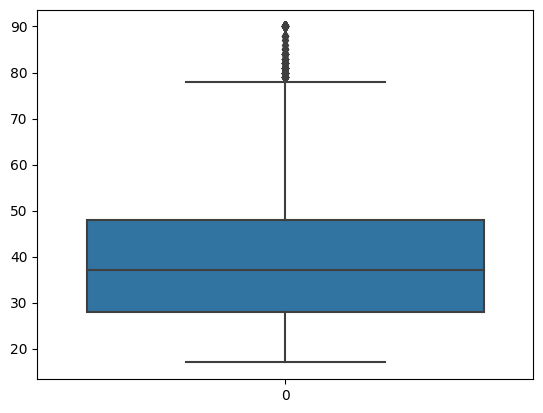

In [10]:
sns.boxplot(data.age)

<Axes: >

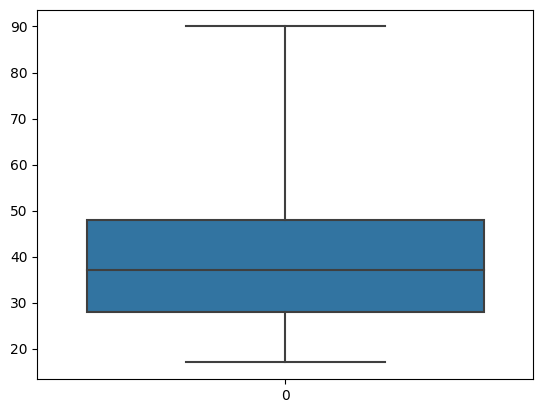

In [11]:
sns.boxplot(data.age, whis = 3)

#### **STD: Standard Deviation**

Variance: root(variance) = STD

mean +- std --> general distribution of the data

38 + 13 = 51

38 - 13 = 25

#### **IQR = Interquartile range**
*   Q1 = 28
*   Q3 = 48

IQR = Q3 - Q1 = 48 - 28 = 20

whis value in seaborn.boxplot() is the multiplier of the IQR to be used to filter out the outlier.

For example:

default value for whis = 1.5

Lower limit = Q1 - 1.5 * IQR = 28 - 1.5 * 20 = -2.0

Upper Limit = Q3 + 1.5 * IQR = 48 + 1.5 * 20 = 78

In [12]:
data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [13]:
data.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


##Exploration Data Type


In [14]:
print(data.info())

print(data['income'].unique())
print(data['education'].unique())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
[' <=50K' ' >50K']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 '

In [15]:
print('Unique values of income', data['income'].unique())

Unique values of income [' <=50K' ' >50K']


In [16]:
data['income'].unique().tolist()

[' <=50K', ' >50K']

In [17]:
data.duplicated().any()

True

In [18]:
data[data.duplicated(keep = False)].sort_values(['age', 'fnlwgt']).head(6)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
17673,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
6990,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
15189,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
21490,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K


There are some duplicates in the data. Hence, It is good to filter out duplicates value so your analysis will be more accurate and the machine learning model will not learn about something that is exactly the same twice

In [19]:
data.drop_duplicates(inplace = True)

##Exploratory Data Analysis

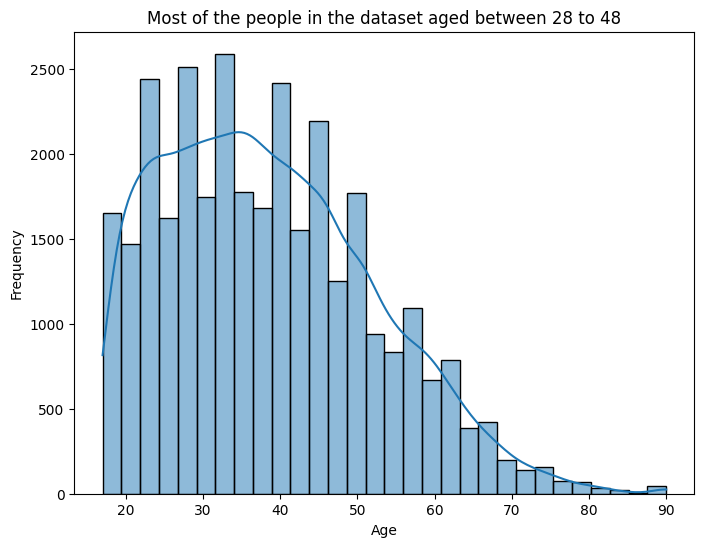

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Most of the people in the dataset aged between 28 to 48')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

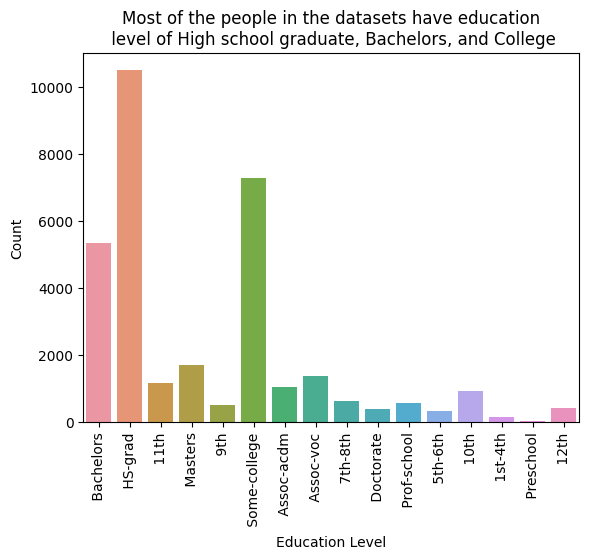

In [21]:
sns.countplot(x='education', data=data)
plt.xticks(rotation=90)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Most of the people in the datasets have education\n level of High school graduate, Bachelors, and College')
plt.show()

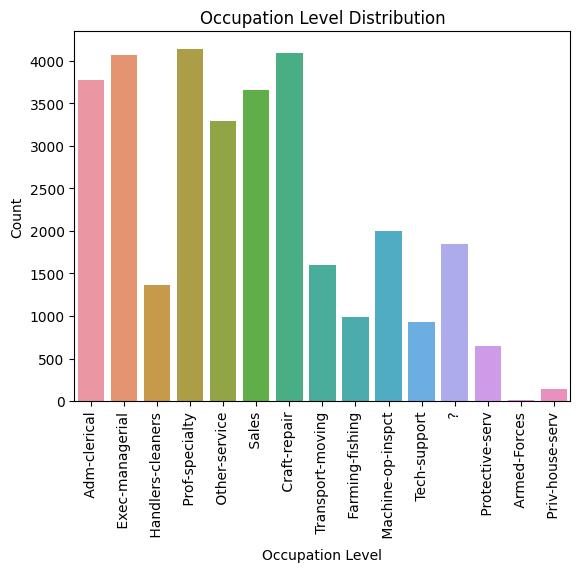

In [22]:
sns.countplot(x='occupation', data=data)
plt.xticks(rotation=90)
plt.xlabel('Occupation Level')
plt.ylabel('Count')
plt.title('Occupation Level Distribution')
plt.show()

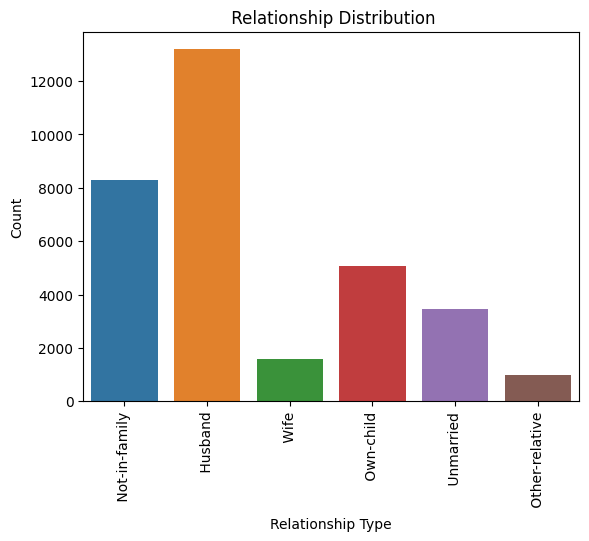

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='relationship', data=data)
plt.xticks(rotation=90)
plt.xlabel('Relationship Type')
plt.ylabel('Count')
plt.title(' Relationship Distribution')
plt.show()





['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


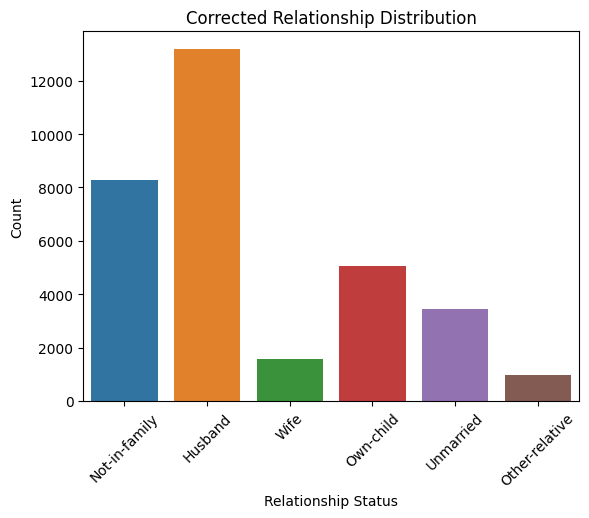

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Map "Husband" and "Wife" to "Married"
data['relationship'] = data['relationship'].replace(['Husband', 'Wife'], 'Married')

# Remove leading and trailing whitespace
data['relationship'] = data['relationship'].str.strip()

# Create a new column to represent the corrected distribution
data['relationship_corrected'] = data['relationship']


print(data['relationship_corrected'].unique())

sns.countplot(x='relationship_corrected', data=data)
plt.xticks(rotation=45)
plt.xlabel('Relationship Status')
plt.ylabel('Count')
plt.title('Corrected Relationship Distribution')
plt.show()


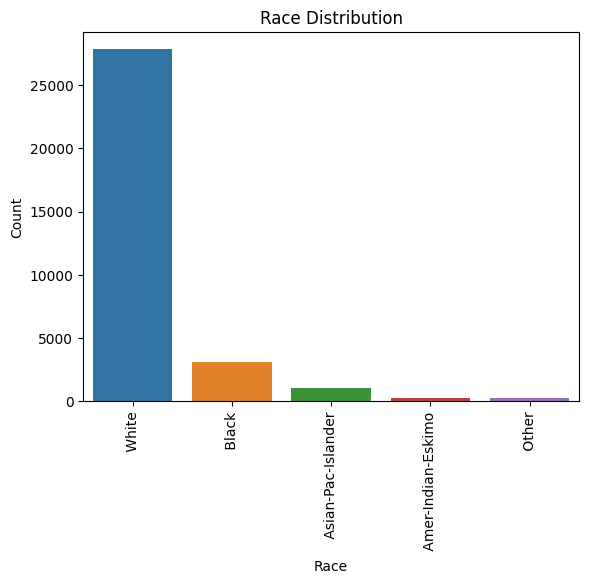

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='race', data=data)
plt.xticks(rotation=90)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Race Distribution')
plt.show()

In [26]:
continuous_vars = ['sex', 'education','workclass']
for var in continuous_vars:
  print(var)

sex
education
workclass


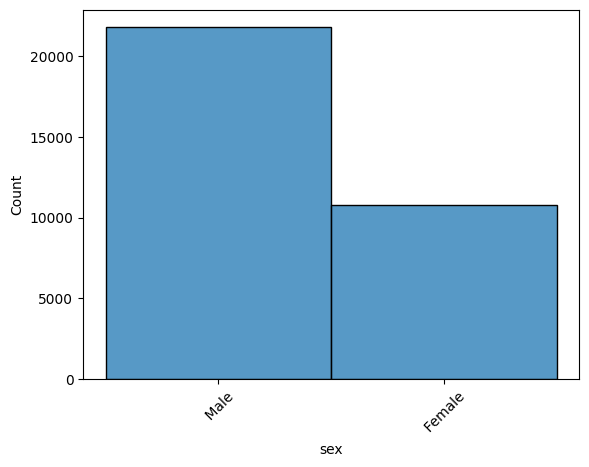

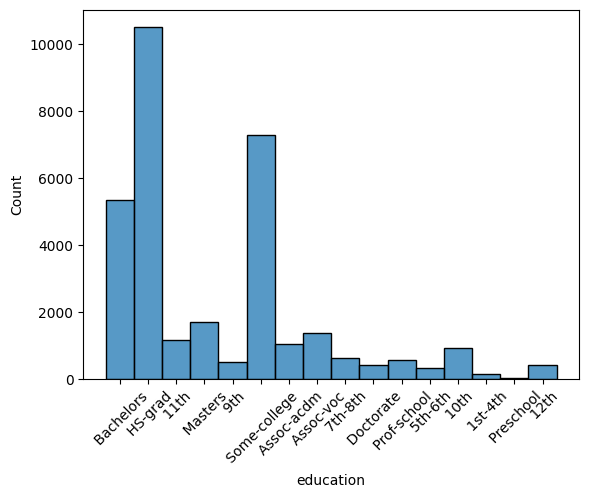

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for continuous variables
continuous_vars = ['sex', 'education']
for var in continuous_vars:
    plt.figure()
    sns.histplot(data[var], bins=30)
    plt.xticks(rotation=45)

In [28]:
cat = []
num = []

for col in data.columns:
    if data[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

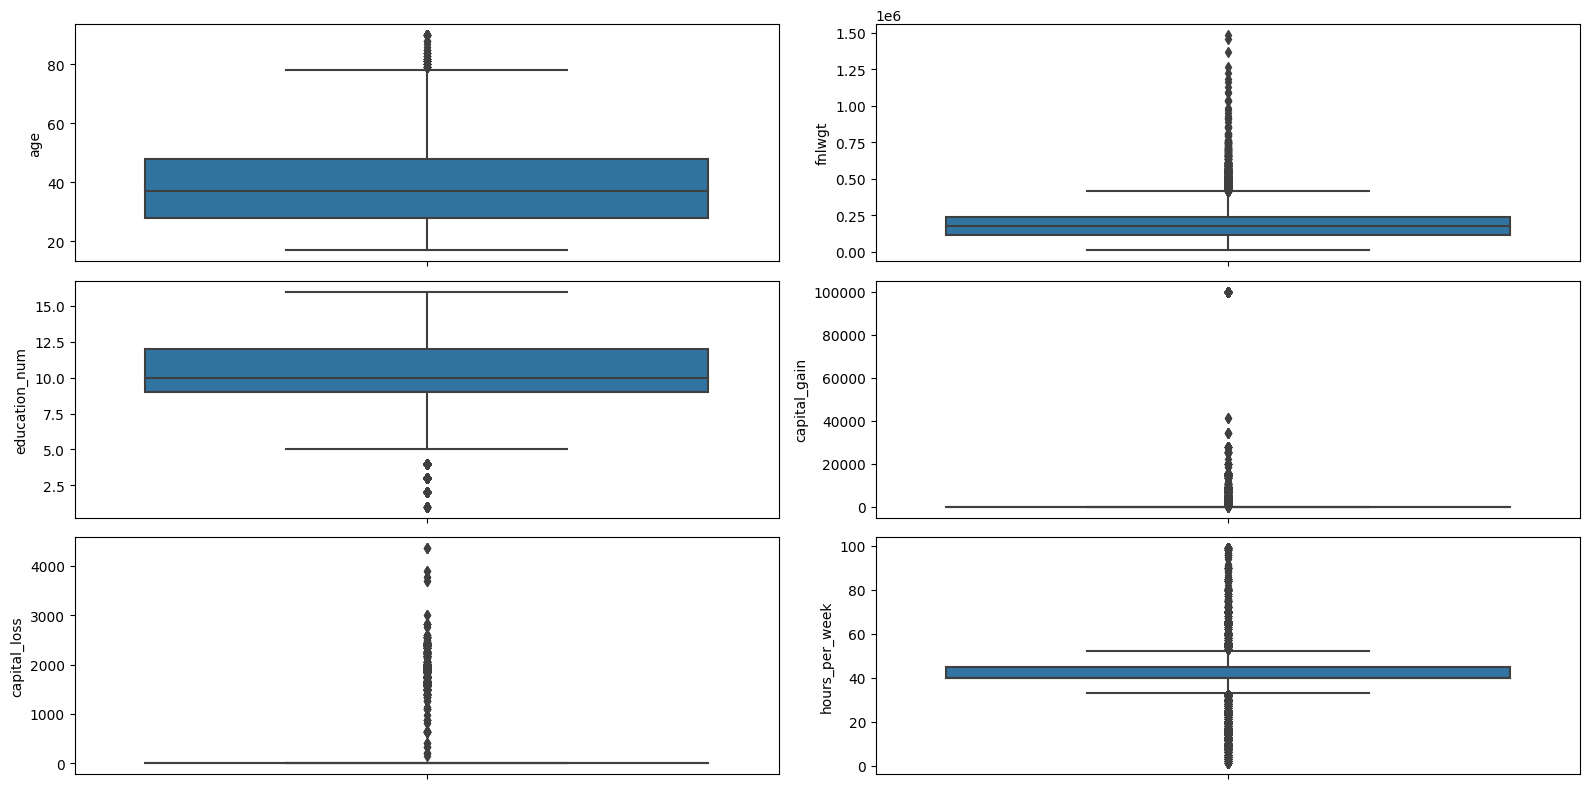

In [29]:
plt.figure(figsize = (16,8))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/3), i+1)
    sns.boxplot(y = data[num[i]], orient = 'v')
    plt.tight_layout()

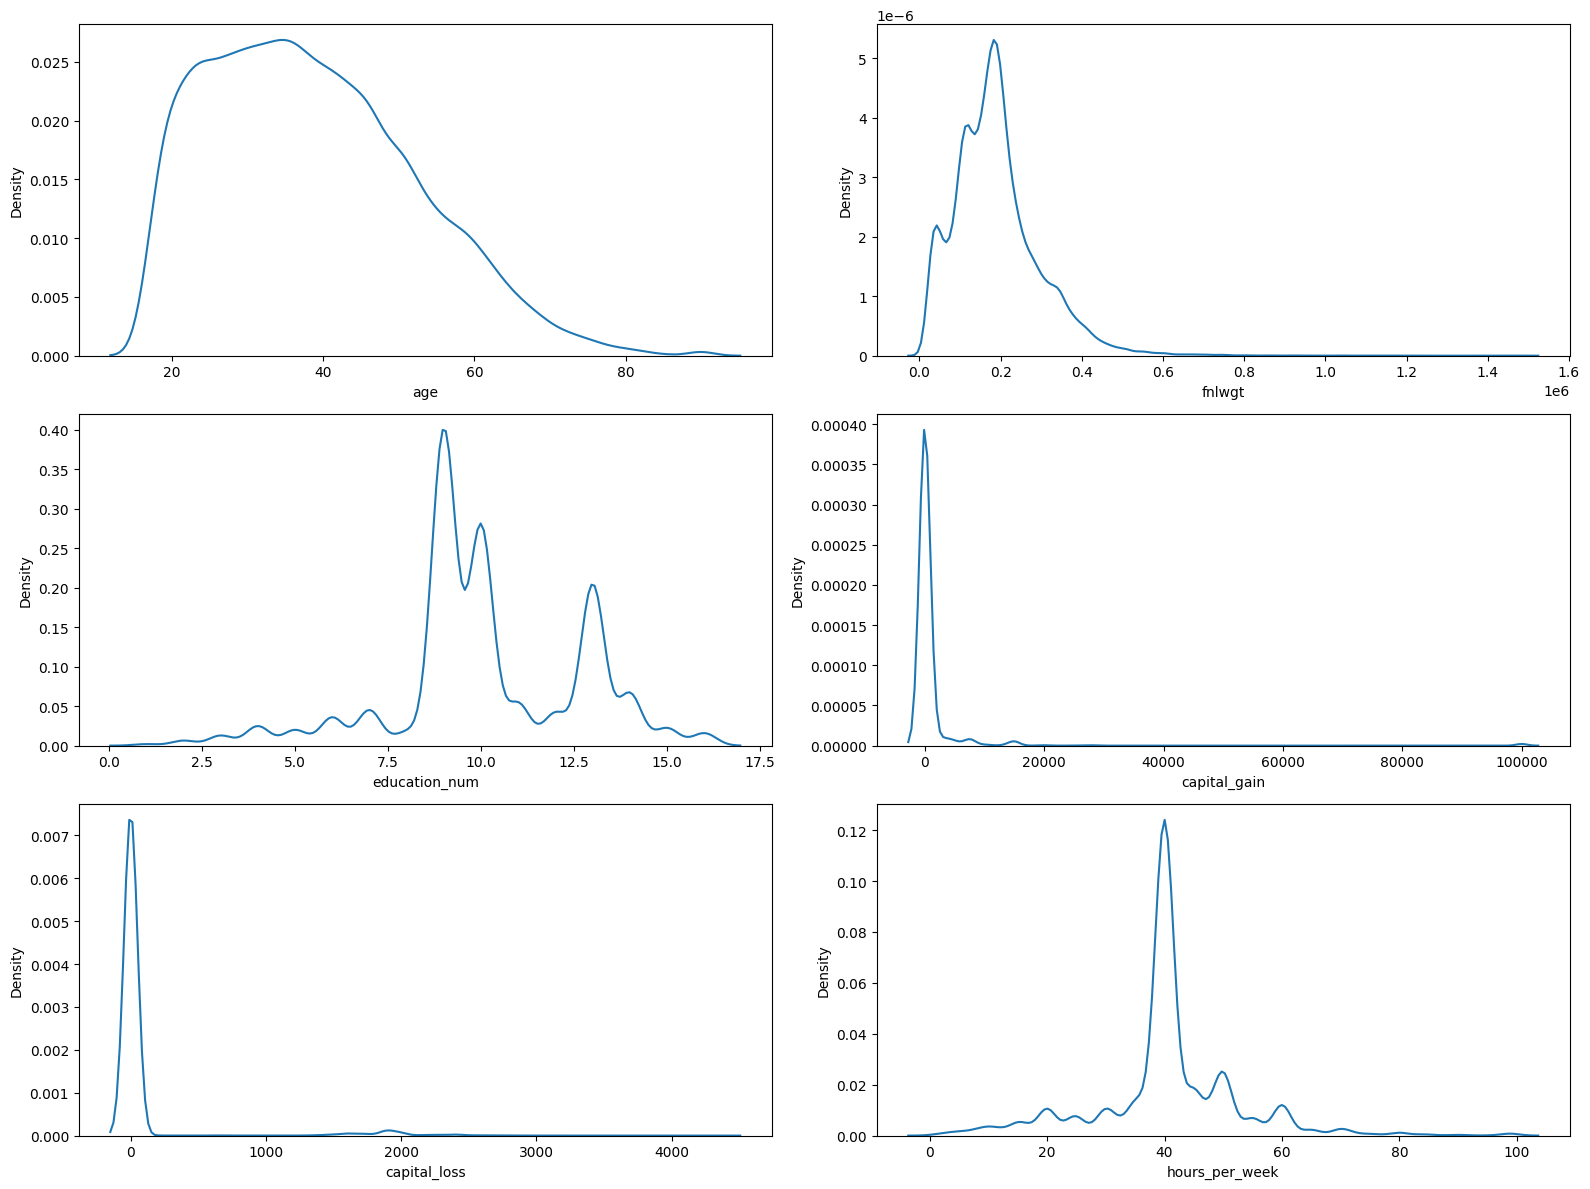

In [30]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/3), i+1)
    sns.kdeplot(x = data[num[i]])
    plt.tight_layout()

Most of the columns have a lot of outliers. For example, the capital_loss and capital_gain have so many outliers because the value are centered at 0.

For the skewness, the most of the columns are right-skewed, therefore we can use log transformation to these columns so it can be more similar to normal distribution.

In [31]:
data.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [32]:
df = data.copy()

In [33]:
df['income'] = df['income'].replace({' <=50K':0, ' >50K':1})

Because the income is in categorical value, and there are only 2 incomes. We can just map the income into numerical values.

<ipython-input-34-cc71ace10e89>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt = '.2f')


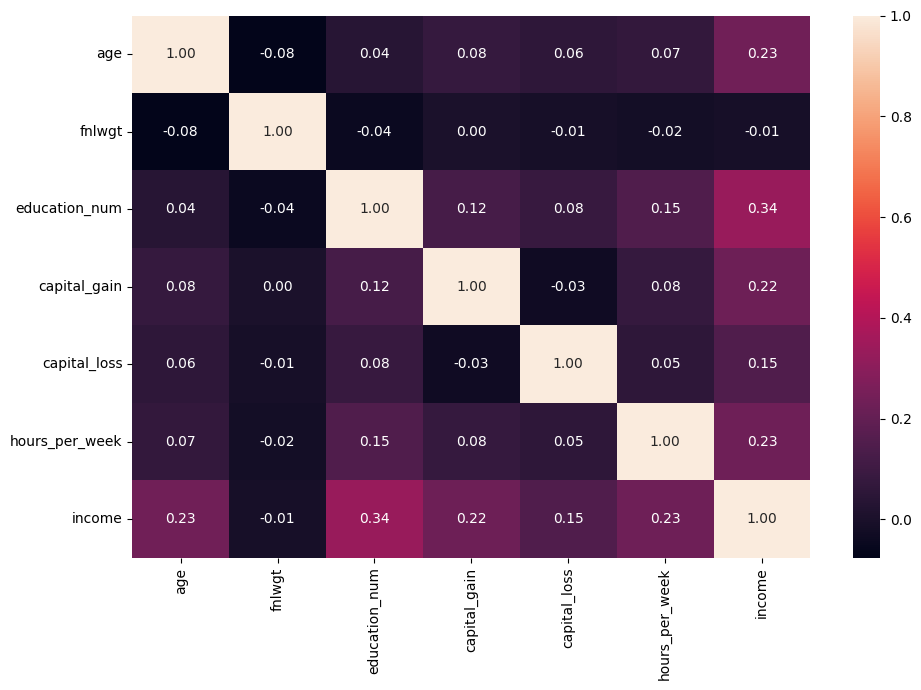

In [34]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')
plt.tight_layout();

We can see what attributes are correlated to the income the most.

Here the education_num has the highest correlation with the income. Which means the income of someone is highly affected by their education(assuming education_num is just the integer representation of their education). Additionally, fnlwgt does not have any meanings. Therefore, we can just drop it.

##Data Preprocessing

### Import Library

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [36]:
df = pd.read_csv("adult.data", names = column_names, header = None)

In [37]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [38]:
cat = []
num = []

for col in data.columns:
    if data[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

### **Things to do:**

*   Drop duplicated data
*   Drop fnlwgt
*   Drop categories with really few counts (below 25)
>* workclass: [' Without-pay', ' Never-worked']
>* marital_status: [' Married-AF-spouse']
>* occupation: [' Armed-Forces']
>* native_country: [' Holand-Netherlands'] --> For the native_country we only remove the one with only 1 value
*   Relationship: Change 'Husband' and 'Wife' to 'Married'
*   Handle outlier using Z-score
*   Split training and unseen data (test data)
*   Feature Engineering
*   Encode the categorical data using one-hot encoding
*   Normalize the data

### Drop Duplicated Data

In [39]:
df.drop_duplicates(inplace = True)

### Drop fnlwgt

In [40]:
df.drop(['fnlwgt'], axis = 1, inplace = True)

In [41]:
num.remove('fnlwgt')

### Drop categories with really few counts (below 25)


In [42]:
df = df[~df['workclass'].isin([' Without-pay', ' Never-worked'])]
df = df[~df['marital_status'].isin([' Married-AF-spouse'])]
df = df[~df['occupation'].isin([' Armed-Forces'])]
df = df[~df['native_country'].isin([' Holand-Netherlands'])]

### Relationship: Change 'Husband' and 'Wife' to 'Married'

In [43]:
df['relationship'] = df['relationship'].replace(['Husband', 'Wife'], 'Married')

Change income to numerical value

In [44]:
df['income'] = df['income'].replace({' <=50K':0, ' >50K':1})

###Outlier Cleaning

In [45]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [46]:
df[num]

,age,education_num,capital_gain,capital_loss,hours_per_week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
32556,27,12,0,0,38
32557,40,9,0,0,40
32558,58,9,0,0,40
32559,22,9,0,0,20


In [47]:
outlier = num.copy()

In [48]:
print(f'Number of training rows before outliers cleaning: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in outlier:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df = df[filtered_entries]

print(f'Number of training rows after outliers cleaning: {len(df)}')

Number of training rows before outliers cleaning: 32483
Number of training rows after outliers cleaning: 30082


### Split training and unseen data (test data)

In [49]:
X = df.drop('income', axis = 1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We should split the train and test dataset so the model can be tested on unseen data.

### Feature Engineering

In [50]:
def map_education(education):
    lower_education = [' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th', ' HS-grad']
    higher_education = [' Bachelors', ' Masters', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' Doctorate', ' Prof-school']

    if education in lower_education:
        return 0
    elif education in higher_education:
        return 1
    else:
        return 0

# Higher education indicates whether the person went to any higher education.
df['higher_education'] = df['education'].apply(map_education)

<ipython-input-50-8800c6a6b367>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['higher_education'] = df['education'].apply(map_education)


###Encoding Categorical Variables

In [51]:
columns = X_train.columns

In [52]:
columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [53]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

### Normalization

In [54]:
X_train = X_train.copy()
X_test = X_test.copy()

for i in X_train.columns:

    # fit on training data column
    scale = MinMaxScaler().fit(X_train[[i]])

    # transform the training data column
    X_train[i] = scale.transform(X_train[[i]])

    # transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])

In [55]:
df[df['native_country'] == ' Holand-Netherlands']

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,higher_education


We can see that there are multiple columns with different scales on the datsets such as age and capital_gain for example. The age only has value between 17-90 but the capital gain has some values until 99999. It will make the model prediction worse because the model will put the importance in the one with more higher value like capital_gain. Therefore we need to normalize it to make the scale the same.

In [56]:
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week,income,higher_education
count,30082.000000,30082.000000,30082.000000,30082.000000,30082.000000,30082.000000,30082.000000
mean,38.118975,10.076225,570.926135,1.199156,39.903131,0.223190,0.543913
std,13.338782,2.454643,2333.684555,32.573343,11.117282,0.416392,0.498076
min,17.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,27.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,1.000000
75%,47.000000,12.000000,0.000000,0.000000,45.000000,0.000000,1.000000
max,79.000000,16.000000,22040.000000,1258.000000,77.000000,1.000000,1.000000


In [57]:
X_train[['age', 'capital_gain']]

,age,capital_gain
2936,0.274194,0.0
27699,0.112903,0.0
26171,0.080645,0.0
19105,0.370968,0.0
2553,0.161290,0.0
...,...,...
32243,0.258065,0.0
5836,0.387097,0.0
926,0.322581,0.0
17071,0.064516,0.0


##Modeling

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

In [59]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
print(f'accuracy Score = {accuracy_score(y_test, y_pred)}')

accuracy Score = 0.8544124979225528


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4640
           1       0.73      0.58      0.65      1377

    accuracy                           0.85      6017
   macro avg       0.81      0.76      0.78      6017
weighted avg       0.85      0.85      0.85      6017



The model is good at predicting class 0 values (people with income below or equals to 50k).

In [62]:
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,higher_education
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,1
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0


In [63]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=[True, False]
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17)
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Actual', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

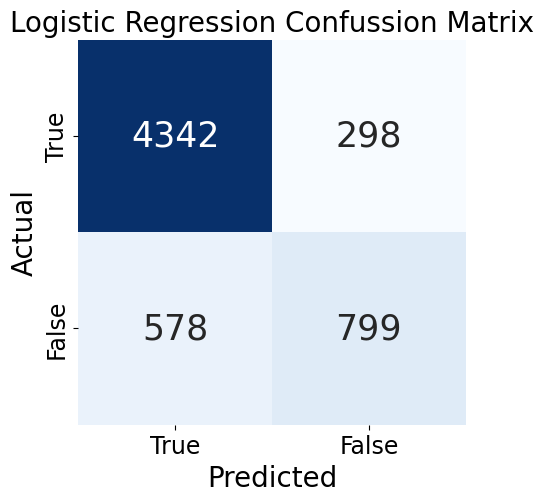

In [64]:
conf_matrix(y_test, y_pred, 'Logistic Regression Confussion Matrix')

### Decision Tree

In [65]:
DT = DecisionTreeClassifier(random_state = 42)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

In [66]:
print(f'accuracy Score = {accuracy_score(y_test, y_pred)}')

accuracy Score = 0.8112015954794748


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4640
           1       0.59      0.58      0.59      1377

    accuracy                           0.81      6017
   macro avg       0.73      0.73      0.73      6017
weighted avg       0.81      0.81      0.81      6017



The model is good at predicting class 0 values (people with income below or equals to 50k).

### Random Forest

In [68]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [69]:
print(f'accuracy Score = {accuracy_score(y_test, y_pred)}')

accuracy Score = 0.8462689047698189


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4640
           1       0.68      0.61      0.65      1377

    accuracy                           0.85      6017
   macro avg       0.79      0.76      0.77      6017
weighted avg       0.84      0.85      0.84      6017



The model is good at predicting class 0 values (people with income below or equals to 50k). However, The random Forest is best model from out of the 3 models to predict the class 1 (people with income above 50k)

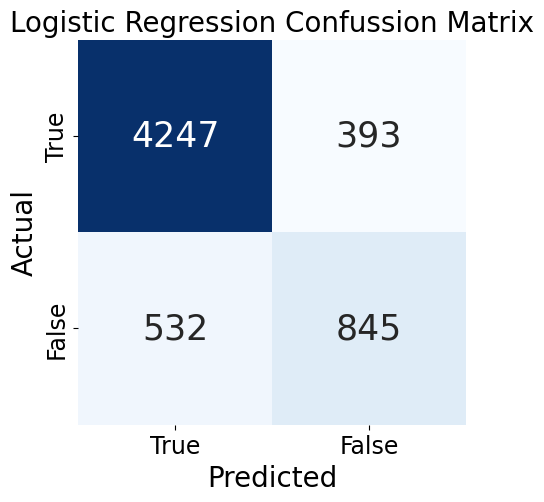

In [71]:
conf_matrix(y_test, y_pred, 'Logistic Regression Confussion Matrix')

In [72]:
# Get feature importances from the Random Forest model
rf_feature_importances = RF.feature_importances_

# Create a DataFrame to hold feature names and their corresponding importances
feature_importance_rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
})

# Sort the DataFrame by the importances
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

feature_importance_rf_df

,Feature,Importance
0,age,0.247789
4,hours_per_week,0.118980
2,capital_gain,0.104703
27,marital_status_ Married-civ-spouse,0.064030
1,education_num,0.061880
...,...,...
95,native_country_ Thailand,0.000095
96,native_country_ Trinadad&Tobago,0.000088
86,native_country_ Outlying-US(Guam-USVI-etc),0.000051
83,native_country_ Laos,0.000034


From the random forest model, we can see that the feature that affects the predictions the most is the age, followed by the hours_per_week, capital_gain, and education_num.